# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [3]:
for column in df:
    df = df.rename(columns={column : column.lower()})
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the Index to be the Line Names

In [4]:
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [5]:
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [6]:
how_many = df.groupby('station')['linename'].nunique()
how_many.head()

station
1 AV             1
103 ST           3
103 ST-CORONA    1
104 ST           2
110 ST           1
Name: linename, dtype: int64

In [7]:
df2 = df.set_index('station')
df2 = df2.sort_index().join(how_many, how='outer', rsuffix='_total').rename(columns={'linename_total':'Num_Lines'}).sort_values(by=['Num_Lines'], ascending=False)
df2.head(500)

,linename,c/a,unit,scp,division,date,time,desc,entries,exits,Num_Lines
station,,,,,,,,,,,
23 ST,NRW,A030,R083,01-00-01,BMT,08/28/2018,04:00:00,REGULAR,6465499,2394915,4
125 ST,23,R304,R206,00-00-02,IRT,08/26/2018,21:00:00,REGULAR,10453394,2279209,4
125 ST,23,R304,R206,00-00-02,IRT,08/28/2018,21:00:00,REGULAR,10456179,2279878,4
125 ST,23,R304,R206,00-00-02,IRT,08/28/2018,17:00:00,REGULAR,10455825,2279818,4
125 ST,23,R304,R206,00-00-02,IRT,08/28/2018,13:00:00,REGULAR,10455511,2279742,4
125 ST,23,R304,R206,00-00-02,IRT,08/28/2018,09:00:00,REGULAR,10455239,2279659,4
125 ST,23,R304,R206,00-00-02,IRT,08/28/2018,05:00:00,REGULAR,10454984,2279558,4
125 ST,23,R304,R206,00-00-02,IRT,08/28/2018,01:00:00,REGULAR,10454977,2279553,4
125 ST,23,R304,R206,00-00-02,IRT,08/27/2018,21:00:00,REGULAR,10454927,2279542,4


In [6]:
#THE FOLLOWING IS HOW I DID IT BEFORE USING PANDAS METHODS

#stations = df.station.tolist()
#unique_stations = list(set(stations))
#print(len(unique_stations))
#num_lines_dict = {}

#df['Num_Lines'] = ""
#for index, row in df.iterrows():
#    if row['station'] not in num_lines_dict.keys():
#        num_lines_dict[row['station']] = []
#    num_lines_dict[row['station']].append(row['linename'])
#
#print(len(num_lines_dict))
#print(num_lines_dict)


373
373


In [7]:
#num_lines_fixed = {}
#for key in num_lines_dict:
#    num_lines_fixed[key] = len(set(num_lines_dict[key]))
#print(len(num_lines_fixed))
#print(num_lines_fixed)

373
{'59 ST': 3, '5 AV/59 ST': 1, '57 ST-7 AV': 1, '49 ST': 1, 'TIMES SQ-42 ST': 3, '34 ST-HERALD SQ': 1, '28 ST': 2, '23 ST': 4, '14 ST-UNION SQ': 2, '8 ST-NYU': 1, 'PRINCE ST': 1, 'CANAL ST': 3, 'CITY HALL': 1, 'CORTLANDT ST': 1, 'RECTOR ST': 2, 'WHITEHALL S-FRY': 1, 'DELANCEY/ESSEX': 1, 'BOWERY': 1, 'CHAMBERS ST': 3, 'FULTON ST': 3, 'BROAD ST': 1, '7 AV': 3, 'PARK PLACE': 2, 'BOTANIC GARDEN': 1, 'PROSPECT PARK': 1, 'PARKSIDE AV': 1, 'CHURCH AV': 3, 'BEVERLEY ROAD': 1, 'CORTELYOU RD': 1, 'NEWKIRK PLAZA': 1, 'AVENUE H': 1, 'AVENUE J': 1, 'AVENUE M': 1, 'KINGS HWY': 3, 'AVENUE U': 3, 'NECK RD': 1, 'SHEEPSHEAD BAY': 1, 'BRIGHTON BEACH': 1, 'OCEAN PKWY': 1, 'BOROUGH HALL': 2, 'JAY ST-METROTEC': 2, 'DEKALB AV': 2, 'ATL AV-BARCLAY': 2, 'UNION ST': 1, '4AV-9 ST': 1, 'PROSPECT AV': 2, '25 ST': 1, '36 ST': 2, '45 ST': 1, '53 ST': 1, 'BAY RIDGE AV': 1, '77 ST': 2, '86 ST': 4, 'BAY RIDGE-95 ST': 1, '8 AV': 2, 'FT HAMILTON PKY': 3, 'NEW UTRECHT AV': 1, '18 AV': 3, '20 AV': 2, 'BAY PKWY': 3, '9 A

In [64]:
#for index, row in df.iterrows():
#    df.at[index,'Num_Lines'] = num_lines_fixed[row['station']]
#df_sorted = df.sort_values(by=['Num_Lines'])
#df_sorted.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
98812,F,N528,R257,01-06-01,EAST BROADWAY,IND,08/31/2018,08:00:00,REGULAR,3118060,2484444,1
113980,1,PTH06,R546,00-00-08,PAVONIA/NEWPORT,PTH,08/31/2018,12:02:09,REGULAR,935646,1298481,1
113981,1,PTH06,R546,00-00-08,PAVONIA/NEWPORT,PTH,08/31/2018,16:14:09,REGULAR,935967,1298959,1
113982,1,PTH06,R546,00-00-08,PAVONIA/NEWPORT,PTH,08/31/2018,20:26:09,REGULAR,936279,1299823,1
113983,1,PTH06,R546,00-00-09,PAVONIA/NEWPORT,PTH,08/25/2018,03:39:25,REGULAR,404642,330523,1


## Write a function to clean a column name.

In [8]:
def clean(col_name):
    cleaned = col_name.strip().lower()
    return cleaned

In [9]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [10]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [11]:
pd.to_datetime(df.date).head()

0   2018-08-25
1   2018-08-25
2   2018-08-25
3   2018-08-25
4   2018-08-25
Name: date, dtype: datetime64[ns]

In [13]:
df.date = pd.to_datetime(df.date)
df['day_of_week'] = df.date.dt.day_name()
#df = df.drop('desc', axis=1)
#df['total_activity'] = df['entries'] + df['exits']
df = df.drop(columns=['total_activity'])
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,day_of_week
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,Saturday
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,Saturday
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,Saturday
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,Saturday
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,Saturday


In [15]:
df_activity = df.groupby('day_of_week').sum()
df_activity = df_activity.reindex(index=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
df_activity.head(7)

,entries,exits
day_of_week,,
Sunday,1192306179082,959223750461
Monday,1114237052454,911938153513
Tuesday,1143313287046,942230721477
Wednesday,1123655222441,920630864687
Thursday,1122723988662,920691927110
Friday,1110224700078,906799065337
Saturday,1115661545514,909142081474


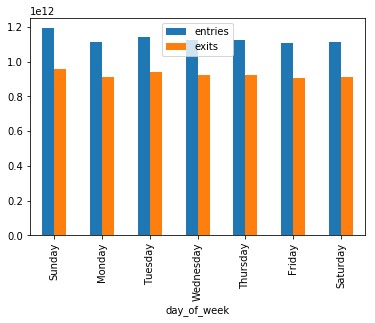

In [16]:
df_activity.plot.bar()

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [ ]:
#There appears to be slightly more traffic on weekends than on weekdays, although the amount of
#traffic seems to be relatively consistent all week long, with slightly less activity on mon/fri

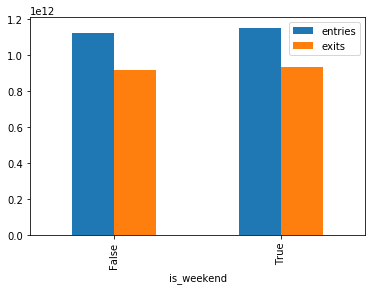

In [19]:
df_activity['is_weekend'] = df_activity.index.map({'Sunday': True,
                                                        'Monday': False,
                                                        'Tuesday': False,
                                                        'Wednesday': False,
                                                        'Thursday': False,
                                                        'Friday': False,
                                                        'Saturday': True})
wkend_comp = df_activity.groupby('is_weekend').mean()
wkend_comp.plot.bar()

# Drop a couple of columns

In [22]:
df3 = df.drop(['desc','division'],axis=1)
df3.head()

,linename,c/a,unit,scp,station,date,time,entries,exits,day_of_week
0,NQR456W,A002,R051,02-00-00,59 ST,2018-08-25,00:00:00,6736067,2283184,Saturday
1,NQR456W,A002,R051,02-00-00,59 ST,2018-08-25,04:00:00,6736087,2283188,Saturday
2,NQR456W,A002,R051,02-00-00,59 ST,2018-08-25,08:00:00,6736105,2283229,Saturday
3,NQR456W,A002,R051,02-00-00,59 ST,2018-08-25,12:00:00,6736180,2283314,Saturday
4,NQR456W,A002,R051,02-00-00,59 ST,2018-08-25,16:00:00,6736349,2283384,Saturday
